In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from  tensorflow.python import pywrap_tensorflow

In [2]:
import os
print("DIR",os.getcwd())
cur_dir = os.getcwd()
train_path = os.path.join(cur_dir,"Datasets","Train")
test_path = os.path.join(cur_dir,"Datasets","Test")
valid_path = os.path.join(cur_dir,"Datasets","Valid")



DIR c:\Users\vivek\OneDrive\Desktop\Vivek\Off\Projects\Potato


In [3]:
training_set = tf.keras.utils.image_dataset_from_directory( 
    train_path,
    labels = "inferred",
    label_mode= "categorical",
    class_names = None,
    color_mode = "rgb",
    image_size = (128,128),
    shuffle = True,
    interpolation = "bilinear"
)

Found 900 files belonging to 3 classes.


In [4]:
labels = training_set.class_names
print(labels)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels = "inferred",
    label_mode= "categorical",
    color_mode = "rgb",
    image_size = (128,128),
    shuffle = True,
    interpolation = "bilinear"
)



Found 300 files belonging to 3 classes.


In [6]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape = [128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))
cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))


C:\Users\vivek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate = 0.0001),loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [8]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.3592 - loss: 1.5649 - val_accuracy: 0.3933 - val_loss: 0.9903
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.5377 - loss: 0.9047 - val_accuracy: 0.5933 - val_loss: 0.7749
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.6665 - loss: 0.6824 - val_accuracy: 0.8000 - val_loss: 0.4752
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.7816 - loss: 0.4833 - val_accuracy: 0.7100 - val_loss: 0.6367
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.7732 - loss: 0.6127 - val_accuracy: 0.8333 - val_loss: 0.3810
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 39s 978ms/step - accuracy: 0.8370 - loss: 0.4042 - val_accuracy: 0.9000 - val_loss: 0.2484
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8890 - loss: 0.2620 - val_accuracy: 0.9033 - val_loss: 0.2149
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9235 - loss: 0.2151 - val_accuracy: 0.9467 - val_lo

In [11]:
train_loss, train_acc = cnn.evaluate(training_set)
train_acc

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/step - accuracy: 0.9410 - loss: 0.1466


0.9366666674613953

In [16]:
val_loss, val_acc = cnn.evaluate(validation_set)
val_acc

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.9167 - loss: 0.2512


0.9100000262260437

In [17]:
cnn.save('trained_plant_disease_model.keras')

In [18]:
training_history.history

{'accuracy': [0.4000000059604645,
  0.5944444537162781,
  0.7133333086967468,
  0.7844444513320923,
  0.8022222518920898,
  0.855555534362793,
  0.898888885974884,
  0.9311110973358154,
  0.9344444274902344,
  0.9566666483879089],
 'loss': [1.2603403329849243,
  0.8223530650138855,
  0.612093985080719,
  0.48947444558143616,
  0.49354833364486694,
  0.35668429732322693,
  0.24235720932483673,
  0.19341380894184113,
  0.1699245721101761,
  0.1219240128993988],
 'val_accuracy': [0.3933333456516266,
  0.5933333039283752,
  0.800000011920929,
  0.7099999785423279,
  0.8333333134651184,
  0.8999999761581421,
  0.903333306312561,
  0.9466666579246521,
  0.9399999976158142,
  0.9100000262260437],
 'val_loss': [0.9903049468994141,
  0.7749199271202087,
  0.47524744272232056,
  0.6367119550704956,
  0.3809513747692108,
  0.24843846261501312,
  0.21486768126487732,
  0.156895250082016,
  0.16199509799480438,
  0.27715063095092773]}

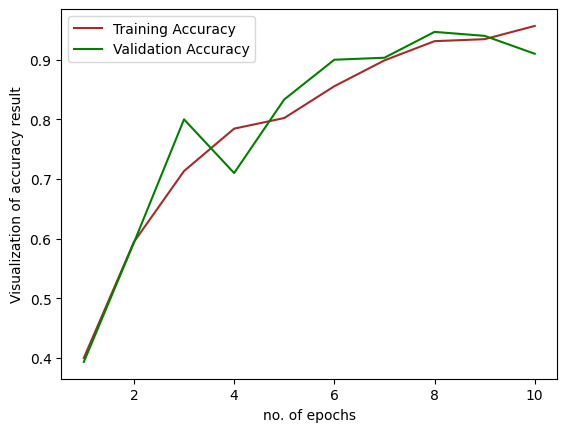

In [15]:
epochs = [ i  for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color = 'brown', label = 'Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color ='green', label = 'Validation Accuracy')
plt.xlabel("no. of epochs")
plt.ylabel("Visualization of accuracy result")
plt.legend()
plt.show()